In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from copy import deepcopy

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

## Random walk 1D

In [3]:
p = 0.5
start_position = 0
current_position = start_position

In [4]:
iteration_number = 1000
stats = []

In [5]:
for _ in range(iteration_number):
    if random.random() > p:
        current_position += 1
    else:
        current_position -= 1
    stats.append(current_position)

In [6]:
stats_np = np.array(stats)

Математическое ожидание

In [7]:
stats_np.mean()

10.45

Стандартное отклонение

In [8]:
stats_np.std()

10.012666977384198

Дисперсия

In [9]:
stats_np.var()

100.25350000000002

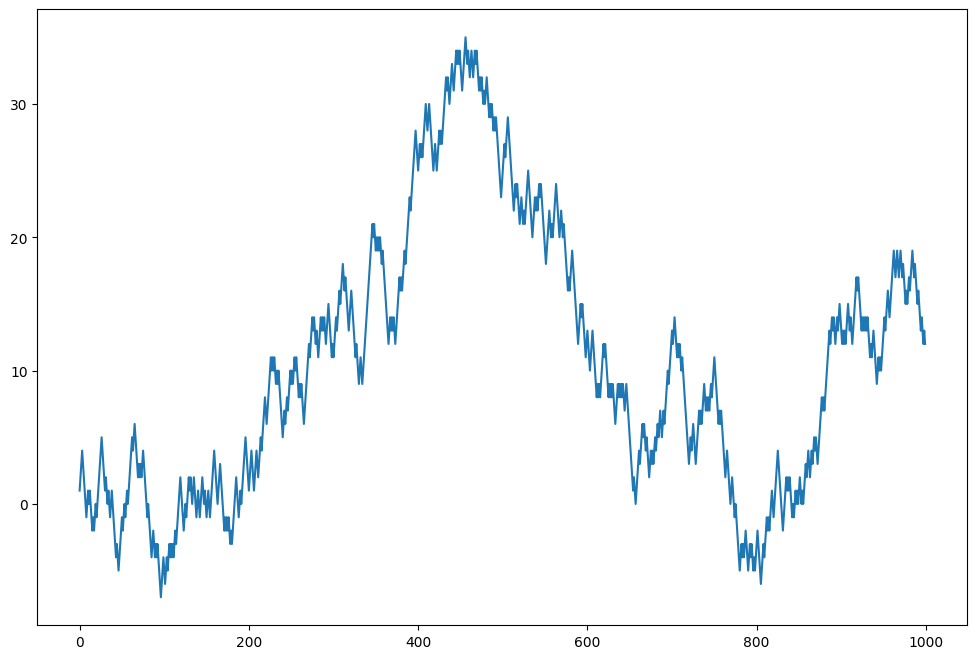

In [10]:
plt.plot(stats_np)
plt.show()

In [11]:
histogram_data = dict(sorted(Counter(stats_np).items()))

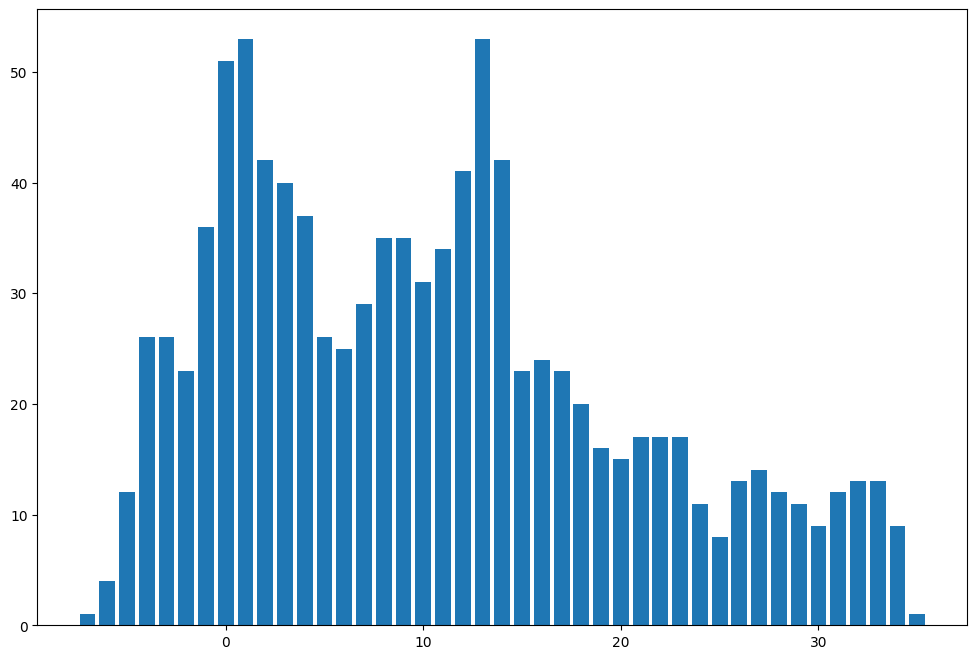

In [12]:
plt.bar(list(histogram_data.keys()), histogram_data.values())
plt.show()

In [13]:
def compute_span(stats, interval_size=100):
    return max([
                max(stats[i:i + interval_size]) - min(stats[i:i + interval_size])
                for i in range(stats.shape[0] - interval_size)
            ])

In [14]:
compute_span(stats_np, 100)

24

In [15]:
compute_span(stats_np, stats_np.shape[0] - 1)

42

Вероятность снова вернуться в 0

In [16]:
histogram_data[0]/len(stats_np)

0.051

### Random walk 2D

In [60]:
pUp = 0.25
pDown = 0.5
pRight = 0.75
start_position = [0, 0]
current_position = start_position

In [93]:
iteration_number = 3000
stats = []

In [94]:
for _ in range(iteration_number):
    rand = random.random()
    if 0 <= rand < pUp:
        current_position[1] += 1
    elif pUp <= rand < pDown:
        current_position[1] -= 1
    elif pDown <= rand < pRight:
        current_position[0] += 1
    else:
        current_position[0] -= 1

    stats.append(deepcopy(current_position))

In [95]:
stats_np = np.array(stats)

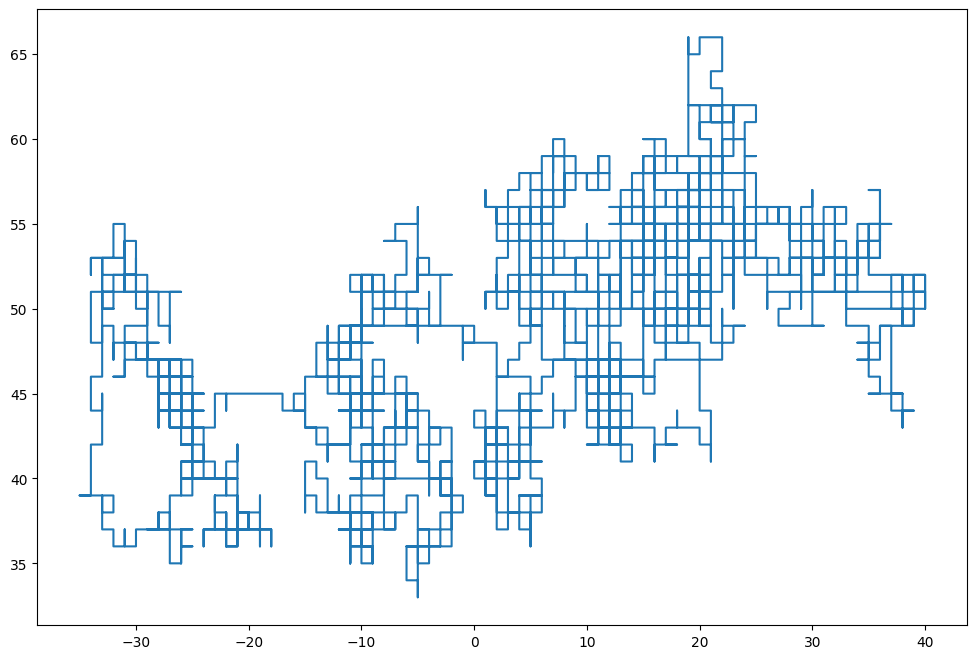

In [96]:
x = stats_np[:, 0]
y = stats_np[:, 1]
plt.plot(x, y)
plt.show()

In [97]:
print(f"Математическое ожидание по абсциссе: {x.mean()}")
print(f"Математическое ожидание по ординате: {y.mean()}")

Математическое ожидание по абсциссе: 4.503333333333333
Математическое ожидание по ординате: 48.734


In [98]:
print(f"Стандартное отклонение по абсциссе: {x.std()}")
print(f"Стандартное отклонение по ординате: {y.std()}")

Стандартное отклонение по абсциссе: 18.814603961344023
Стандартное отклонение по ординате: 6.392071443071748


In [99]:
print(f"Дисперсия по абсциссе: {x.var()}")
print(f"Дисперсия по ординате: {y.var()}")

Дисперсия по абсциссе: 353.9893222222222
Дисперсия по ординате: 40.858577333333336


In [100]:
def counter(stats):
    result = []
    for node in stats:
        if len(result) > 1 and node in np.array(result, dtype=object)[:, 0]:
            result[np.array(result)[:, 0].index(node)][1] += 1
        else:
            result.append([node, 1])
    return result

In [101]:
histogram_data = np.array([[item[0][0], item[0][1], item[1]] for item in counter(stats_np)])

/tmp/ipykernel_14862/1937613679.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if len(result) > 1 and node in np.array(result, dtype=object)[:, 0]:


In [102]:
x_hist = histogram_data[:, 0]
y_hist = histogram_data[:, 1]
z_hist = histogram_data[:, 2]

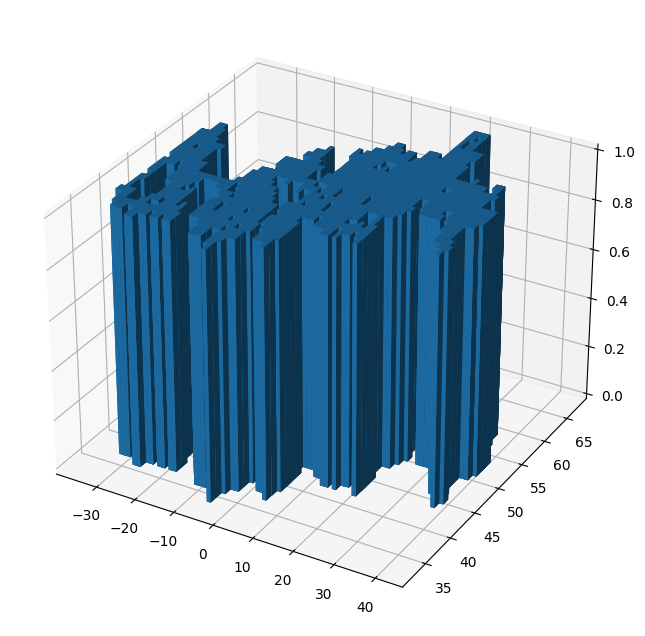

In [103]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')

x3 = x_hist
y3 = y_hist
z3 = np.zeros(len(z_hist))

dx = np.ones(len(x_hist))
dy = np.ones(len(y_hist))
dz = z_hist

ax1.bar3d(x3, y3, z3, dx, dy, dz)
plt.show()

In [104]:
start_point_count = 0
for item in histogram_data:
    if item[0] == start_position[0] and item[1] == start_position[1]:
        start_point_count = item[2]
        break

In [105]:
start_point_count / z_hist.sum()

0.0003333333333333333